# THIS IS BY DONE BY USING REGRESSION INSTEAD OF CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bitcoin_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,9,21


In [4]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,9,21,1


open-close: Difference between opening and closing prices.

low-high: Difference between low and high prices.

is_quarter_end: Indicator for quarter-end.

In [5]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = df['Close'].shift(-1)  # Predict the next close price

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,424.440002
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,394.795990
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,9,19,1,29.307007,-43.302979,408.903992
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,398.821014
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,402.152008


Moving averages (e.g., 7-day, 30-day):

In [6]:
df['ma7'] = df['Close'].rolling(window=7).mean()
df['ma30'] = df['Close'].rolling(window=30).mean()


Daily returns:

In [7]:
df['daily_return'] = df['Close'].pct_change()

Volatility (e.g., standard deviation over a window)

In [8]:
df['volatility'] = df['Close'].rolling(window=7).std()

Drop any rows with NaN caused by rolling calculations:

In [9]:
df = df.dropna()

In [10]:
features = df[['open-close', 'low-high', 'is_quarter_end', 'ma7', 'ma30', 'daily_return', 'volatility']]
target = df['target']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(3346, 7) (372, 7)


In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target,ma7,ma30,daily_return,volatility
29,2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000,2014,10,16,0,11.962006,-25.737000,383.757996,381.574720,384.112801,-0.030947,15.312384
30,2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700,2014,10,17,0,-1.001984,-10.088989,391.441986,384.745575,381.660267,0.003142,12.521266
31,2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800,2014,10,18,0,-7.465973,-16.186981,389.545990,388.908857,380.560333,0.020023,7.749795
32,2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570,2014,10,19,0,1.708008,-7.481995,382.845001,390.479854,380.385333,-0.004844,6.273744
33,2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000,2014,10,20,0,6.385986,-11.832001,386.475006,389.398568,379.516700,-0.017202,6.907262


In [12]:
df.isna().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
year              0
month             0
day               0
is_quarter_end    0
open-close        0
low-high          0
target            0
ma7               0
ma30              0
daily_return      0
volatility        0
dtype: int64

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

models = [LinearRegression(), RandomForestRegressor(), XGBRegressor()]
for model in models:
    model.fit(X_train, Y_train)
    train_pred = model.predict(X_train)
    valid_pred = model.predict(X_valid)

    print(f'{model}:')
    print('Training MAE:', mean_absolute_error(Y_train, train_pred))
    print('Validation MAE:', mean_absolute_error(Y_valid, valid_pred))
    print('Validation RMSE:', mean_squared_error(Y_valid, valid_pred, squared=False))
    print()


LinearRegression():
Training MAE: 689.3474122749863
Validation MAE: 614.2994572414316
Validation RMSE: 1203.641029450209

RandomForestRegressor():
Training MAE: 256.8199861469257
Validation MAE: 647.38429008771
Validation RMSE: 1313.7809389233068

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...):
Trai

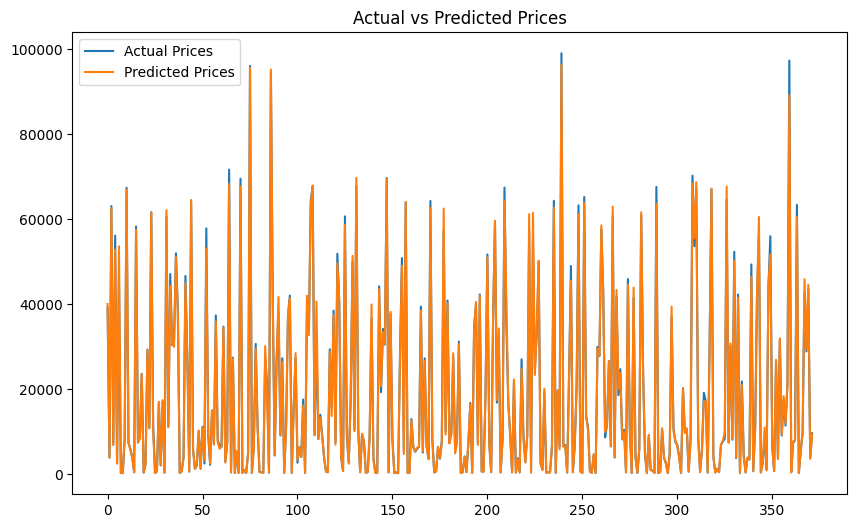

In [14]:
import matplotlib.pyplot as plt

best_model = models[2]  # For example, using XGBRegressor
valid_pred = best_model.predict(X_valid)

plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_valid)), Y_valid, label='Actual Prices')
plt.plot(range(len(Y_valid)), valid_pred, label='Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()


Predicting based on an input:

In [15]:
# Function to predict the next close price
def predict_next_close(model, input_data):
    """
    Predict the next close price based on input features.

    Parameters:
    - model: Trained regression model
    - input_data: Array-like, shape (n_features,) or (n_samples, n_features)

    Returns:
    - Predicted close price(s)
    """
    # Ensure the input is scaled using the same scaler used during training
    input_data_scaled = scaler.transform([input_data] if len(input_data.shape) == 1 else input_data)
    prediction = model.predict(input_data_scaled)
    return prediction

# Example usage
# Input data should follow the feature order: ['open-close', 'low-high', 'is_quarter_end', 'ma7', 'ma30', 'daily_return', 'volatility']
example_input = [100, 200, 1, 40000, 40500, 0.02, 500]  # Replace with actual input values
predicted_value = predict_next_close(best_model, np.array(example_input))

print(f"Predicted next close price: {predicted_value[0]:.2f}")


Predicted next close price: 38379.26


Saving the model

In [16]:
import joblib

# Save the trained model
joblib.dump(best_model, 'xgb_model.pkl')
print("Model saved as 'xgb_model.pkl'")


Model saved as 'xgb_model.pkl'


load the model

In [17]:
# Load the saved model
loaded_model = joblib.load('xgb_model.pkl')
print("Model loaded successfully.")

# Example usage with the loaded model
example_input = [100, 200, 1, 40000, 40500, 0.02, 500]  # Replace with actual input values
predicted_value = predict_next_close(loaded_model, np.array(example_input))

print(f"Predicted next close price (using loaded model): {predicted_value[0]:.2f}")


Model loaded successfully.
Predicted next close price (using loaded model): 38379.26


$38528.49

Save the Scaler:

In [18]:
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")


Scaler saved as 'scaler.pkl'


In [19]:
# Load the scaler
loaded_scaler = joblib.load('scaler.pkl')
print("Scaler loaded successfully.")


Scaler loaded successfully.


## Doing it with neural networks:

1. Why LSTM?

LSTMs are ideal for sequential data like time series because they can capture long-term dependencies in the data. For price prediction, they process historical price patterns and predict future values.

2. Reshape Data for LSTM

LSTMs expect 3D input: (samples, time steps, features). We'll create sequences of data where each sequence represents a sliding window of historical prices.

Example: 

If you want to use the last 30 days to predict the next day's price:
Input: 30 days of historical prices.
Output: The price on day 31.

3. Prepare the Data

a. Generate sequences

Here’s how to reshape the data for LSTM:

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Features and target
features = df[['Close', 'Open', 'High', 'Low', 'Volume']].values
target = df['Close'].values.reshape(-1, 1)

# Normalize features and target
feature_scaler = MinMaxScaler()
features_scaled = feature_scaler.fit_transform(features)

close_scaler = MinMaxScaler()
target_scaled = close_scaler.fit_transform(target)

# Function to create sequences
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

# Parameters
window_size = 30

# Create sequences
X, y = create_sequences(features_scaled, target_scaled, window_size)

# Train-test split
split = int(len(X) * 0.9)
X_train, X_valid = X[:split], X[split:]
y_train, y_valid = y[:split], y[split:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")

X_train shape: (3319, 30, 5), y_train shape: (3319, 1)
X_valid shape: (369, 30, 5), y_valid shape: (369, 1)


4. Build the LSTM Model

Set up the LSTM architecture using TensorFlow/Keras.

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,009 (199.25 KB)

 Trainable params: 51,009 (199.25 KB)

 Non-trainable params: 0 (0.00 B)

5. Train the Model

Train the model with your training data and validate on unseen data.

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0059 - mae: 0.0413 - val_loss: 0.0024 - val_mae: 0.0357
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 6.9677e-04 - mae: 0.0159 - val_loss: 0.0015 - val_mae: 0.0313
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 6.2990e-04 - mae: 0.0147 - val_loss: 0.0013 - val_mae: 0.0274
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 6.3355e-04 - mae: 0.0147 - val_loss: 0.0033 - val_mae: 0.0463
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 5.2733e-04 - mae: 0.0134 - val_loss: 0.0020 - val_mae: 0.0335
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 4.3617e-04 - mae: 0.0121 - val_loss: 9.4247e-04 - val_mae: 0.0235
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 4.9758e-04 - mae: 0.0128 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 4.1908e-04 - mae: 0.0120 - val_loss: 0.0021 - val_mae: 0.0355
Epoch 9/10
104/1

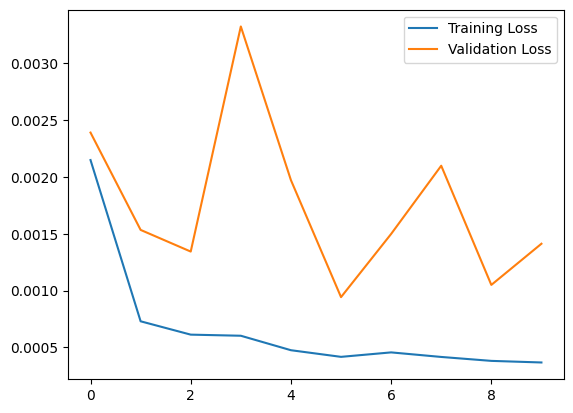

In [22]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

6. Make Predictions

Predict the next prices using your trained model.

a. Predictions on validation set:

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step


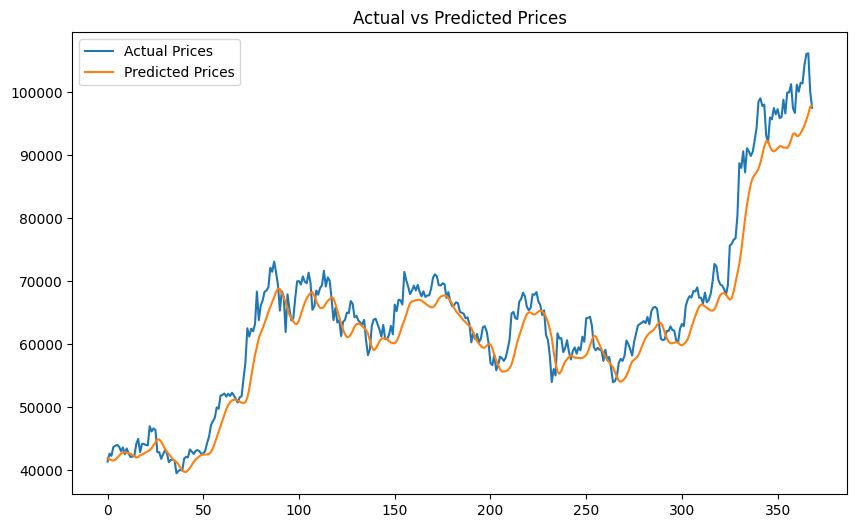

In [23]:
# Predict and inverse transform
y_pred = model.predict(X_valid)
y_pred_rescaled = close_scaler.inverse_transform(y_pred)
y_valid_rescaled = close_scaler.inverse_transform(y_valid)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_valid_rescaled, label='Actual Prices')
plt.plot(y_pred_rescaled, label='Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()

b. Predict future prices:

To predict the next price after the validation set:

In [24]:
# Predict the next price
last_window = features_scaled[-window_size:]
last_window = last_window.reshape(1, last_window.shape[0], last_window.shape[1])

next_price_scaled = model.predict(last_window)
next_price = close_scaler.inverse_transform(next_price_scaled)
print("Next predicted price:", next_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Next predicted price: 97022.72


7. Evaluate the Model

Use metrics like MAE and RMSE for evaluation:

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluation metrics
mae = mean_absolute_error(y_valid_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_valid_rescaled, y_pred_rescaled))
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 3029.795160060976, RMSE: 3981.3031190958864
